In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
# Nhập ảnh
data_folder = "source_images\\"
file_name = data_folder + "demo_image.jpg"
fileContent = tf.read_file(file_name)
source_image = tf.image.decode_jpeg(fileContent, channels = 3)

In [3]:
# Lấy ra kích thước ảnh
init_width = tf.shape(source_image)[0]
init_height = tf.shape(source_image)[1]

In [4]:
# Resize với kích cỡ 256x256
target_size = [256,256]
resize_image = tf.image.resize_images(source_image, target_size, method = tf.image.ResizeMethod.NEAREST_NEIGHBOR)

# Crop với vị trí góc trên bên trái ảnh là (0,0) và lấy kích cỡ 256x256
offset_height = 0
offset_width = 0
target_height = 256
target_width = 256
crop_image = tf.image.crop_to_bounding_box(source_image, offset_height, offset_width, target_height, target_width)

# Flip ảnh trái - phải và trên - dưới
flip_left_right_image = tf.image.flip_left_right(source_image)
flip_up_down_image = tf.image.flip_up_down(source_image)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
# Ghi ảnh ra file
image_int = tf.cast(resize_image, tf.uint8)
image_enc = tf.image.encode_jpeg(image_int)
target_folder = "target_images\\"
target_file_name = target_folder + "resized_image.jpg"
fwrite = tf.write_file(target_file_name, image_enc)

sess = tf.Session()
sess.run([fwrite])

[None]

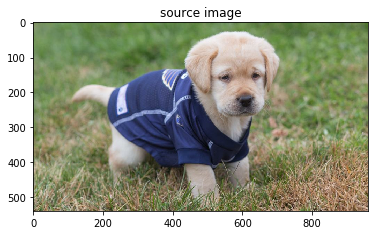

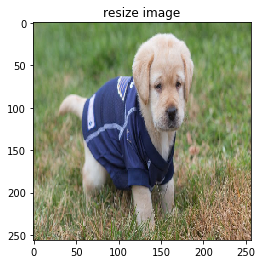

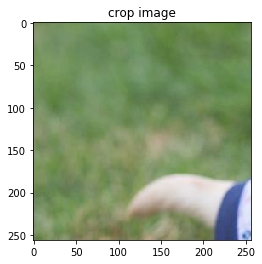

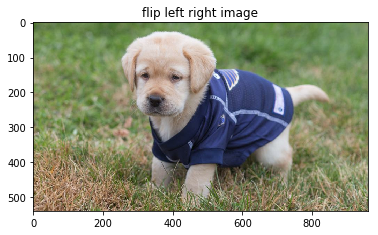

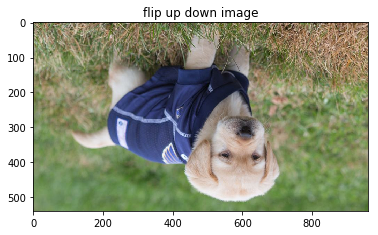

In [6]:
# Chuyển từ Tensor sang ảnh
actual_source_image = source_image.eval(session = sess)
actual_resize_image = resize_image.eval(session = sess)
actual_crop_image = crop_image.eval(session = sess)
actual_flip_left_right_image = flip_left_right_image.eval(session = sess)
actual_flip_up_down_image = flip_up_down_image.eval(session = sess)

# Xuất ảnh ra màn hình
plt.imshow(actual_source_image)
plt.title("source image")
plt.show()

plt.imshow(actual_resize_image)
plt.title("resize image")
plt.show()

plt.imshow(actual_crop_image)
plt.title("crop image")
plt.show()

plt.imshow(actual_flip_left_right_image)
plt.title("flip left right image")
plt.show()

plt.imshow(actual_flip_up_down_image)
plt.title("flip up down image")
plt.show()